<a href="https://colab.research.google.com/github/pablogventura/PostaOpenDefAlg/blob/master/resultadosGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Gráficos simples

En esta notebook recorremos distintos tipos básicos de grafícos que pueden utilizarse en el análisis de datos, con aplicaciones prácticas. Nos centraremos no sólo el código para generarlos, sino también en algunos pequeños trucos para lograr gráficos más legibles.

Es importante recordar que, a pesar de que esta notebook utiliza los datos para ejemplificar los gráficos, en la aplicación real de la ciencia de datos ocurre lo contrario. Debemos pensar primero en la pregunta a responder, y luego diseñar la visualización. Esto incluye:

* Encontrar el gráfico adecuado para los datos
* Agrupar los datos de manera que resalten el patrón que ayuda a responder la pregunta inicial.
* Encontrar los encodings visuales más efectivos para comunicar este patrón (aunque no vamos a hablar tanto de eso en esta notebook).


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [ ]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [ ]:
seaborn.__version__

'0.11.1'

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving results.csv to results.csv


In [ ]:
df = pd.read_csv("results.csv")
df[:3]

,filename,estructura,target,definable,cardinality,elapsed_time,error
0,./alg_random_formula/256_T3_256_0_0_[1]_71.stderr,alg_random,formula,NaN,256,inf,False
1,./alg_random_formula/8_T3_8_0_0_[1]_86.stderr,alg_random,formula,True,8,0.006638,False
2,./alg_random_formula/256_T3_256_0_0_[1]_36.stderr,alg_random,formula,NaN,256,inf,False


In [ ]:
salary_col = 'salary_monthly_NETO'

## Tablas

Las tablas, como todas las que hemos estado usando hasta ahora, son muchas veces dejadas de lado en las visualizaciones. Sin embargo, son una de las formas de representación más poderosa. Usualmente partimos de una tabla para generar visualizaciones más complejas, pero esto no significa que generar buenas tablas no sea útil en el proceso de comunicación.

* Muestran cantidades exactas
* Representan cualquier tipo de datos
* Son de acceso universal
* Son fáciles de crear
* Permiten comprar muchas variables



También pandas nos permite otras operaciones simples de estadística descriptiva. En la siguiente celda, estamos describiendo la distribución de la columna de salario neto, para distintos niveles de estudios.

In [ ]:
df[["estructura", "elapsed_time"]].groupby("estructura").median()

,elapsed_time
estructura,
alg_random,2.310626
boole,0.327326
grupo_abeliano,0.965432


## Gráficos de barras/columnas

* Eje x: variable categórica
* Eje y: variable numérica
(Se puede hacer "acostado" también invirtiendo el orden)

Comparan cantidades numéricas entre variables categóricas. Son uno de los encodings más fieles y fáciles de percibir, es decir, que podemos leer las cantidades represetadas con más exactitud que en otros tipos de gráficos.


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

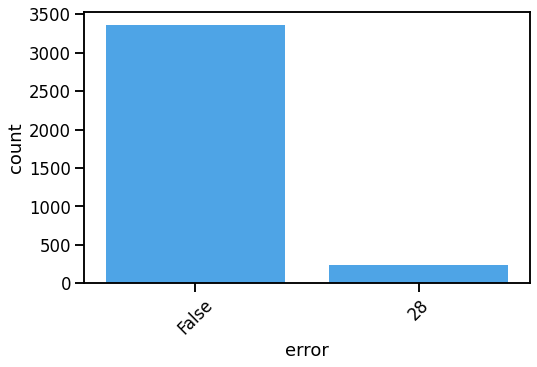

In [ ]:
fig = plt.figure(figsize=(8,5))
seaborn.countplot(data=df, x='error',
                  color=BLUE)
plt.xticks(rotation=45)

(array([0]), <a list of 1 Text major ticklabel objects>)

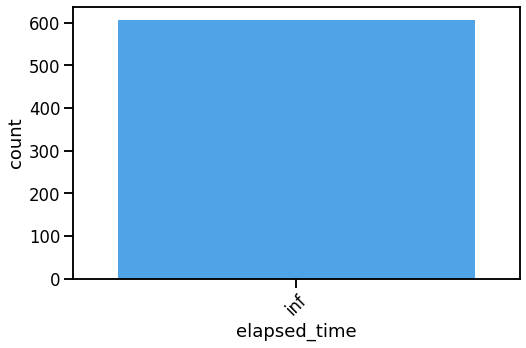

In [ ]:
fig = plt.figure(figsize=(8,5))
df_timeouts = df[df.elapsed_time == numpy.inf]
seaborn.countplot(data=df_timeouts, x='elapsed_time',
                  color=BLUE)
plt.xticks(rotation=45)


Son gráficos muy versátiles, pero no siempre son adecuados. Mientras más barras se grafican, menos atención se pone en la variación entre una barra y otra, y más evidente es la distribución total. Los gráficos de barra también son muy sensibles al ordenamiento, ya que mientras más alejadas están las barras más difícil es compararlas. Por otra parte, la diferencia en el tamaño de cada barra puede codificar sólo cierta cantidad de información. Por ejemplo, si las barras son grandes en alto, una pequeña diferencia entre ellas pasará desapercibida, mientras que si las barras son pequeñas, la misma diferencia será más evidente.

Los gráficos de barra son lo más adecuados para ver las variables categóricas, por ejemplo, el nivel de estudios. En el eje y debemos poner una variable numérica. En este caso, vamos a utilizar la v.a. *media del salario neto*. Para eso, podemos muy fácilmente pasarle a `seaborn` una función para calcular sobre la columna de salario usando el parámetro `estimator`.

Nota: El valor del `estimator` es por defecto la media, pero ahora lo hacemos explícito. Podríamos haber seleccionado otra función, como `numpy.median`, o haber definido una nueva.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

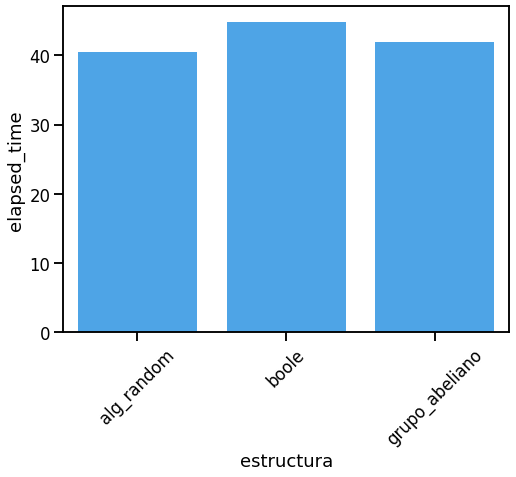

In [ ]:
fig = plt.figure(figsize=(8,6))
df_limpio = df[df.elapsed_time != numpy.inf]

seaborn.barplot(data=df_limpio,
                y="elapsed_time", x="estructura",
                estimator=numpy.mean, ci=None,
                color=BLUE)
plt.xticks(rotation=45)

En este gráfico estamos usando la altura de las barras para representar el promedio de las estimaciones de salario para cada uno de los grupos. Sin embargo, esto no es evidente a primera vista. El usuario no tiene suficiente información para inferir el significado del eje vertical. Hay que tener en cuenta que muchas veces, el nombre original de la columna no representa la información agregada.

Por otra parte, ¿qué significan las líneas negras? Son los intervalos de confianza, que tienen un valor por default de 95. Indica que el verdadero valor poblacional del estadístico se encuentra en ese rango, con una confianza del 95%. Por eso vemos que (probablemente) para varones y mujeres, el rango es mucho más pequeño, ya que la muestra es mucho más grande. Para otros grupo minoritario, no tenemos certeza del valor real de la media poblacional porque la muestra es demasiado pequeña.

Este estadísico suele ser difícil de interpretar para quienes no son expertos en estadística, puede ser conveniente reemplazarlo por la desviación estándar de la muestra. Si bien estamos usando la misma codificación visual (las rayitas negras), los valores que representamos son completamente distintos. Si usamos un intervalo de confianza, estamos hablando de la distribución del estimador de la media poblacional, que es una variable aleatorio que toma valores en todas las muestras posibles. Por otro lado, si usamos la desviación estándar, estamos hablando del valor del estadístico en esta muestra. Pueden explorar ambos valores, pero para este caso, ninguno aporta información útil para el análisis.

Por último, y como estuvimos viendo en clase, algunas de las categorías tienen muy pocos valores para ser útiles. Por eso, las vamos a agrupar.

Con esas observaciones, podemos construir un gráfico más representativo.

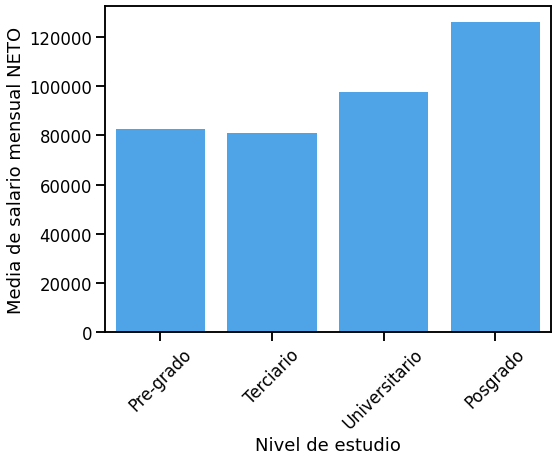

In [ ]:
new_groups = {
    'Posdoctorado': 'Posgrado',
    'Doctorado': 'Posgrado',
    'Primario': 'Pre-grado',
    'Secundario': 'Pre-grado'
}
order = ['Pre-grado', 'Terciario', 'Universitario', 'Posgrado']
grouped_studies_level = df.profile_studies_level.replace(new_groups)
fig = plt.figure(figsize=(8,6))
seaborn.barplot(y=df[salary_col], x=grouped_studies_level,
                estimator=numpy.mean, ci=None,
                color=BLUE, order=order
                )
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y')

### Agrupaciones

Cuando queremos comparar distintos grupos, podemos usar el parámetro `hue`. Esto equivale a sumar otra v.a. al gráfico, que debe ser categórica.

In [ ]:
df.profile_studies_level_state.unique()

array(['En curso', 'Completado', 'Incompleto'], dtype=object)

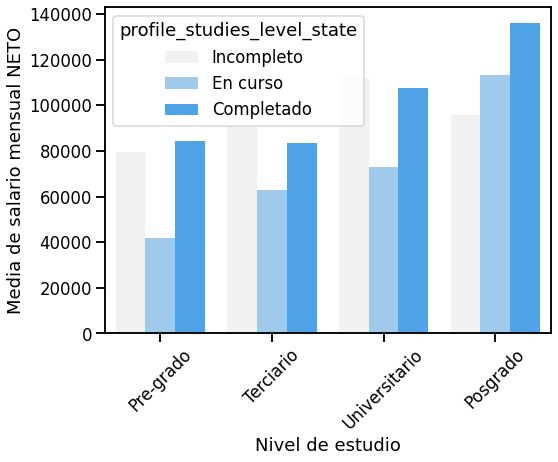

In [ ]:
new_groups = {
    'Posdoctorado': 'Posgrado',
    'Doctorado': 'Posgrado',
    'Primario': 'Pre-grado',
    'Secundario': 'Pre-grado'
}
order = ['Pre-grado', 'Terciario', 'Universitario', 'Posgrado']
hue_order = ['Incompleto', 'En curso', 'Completado']
grouped_studies_level = df.profile_studies_level.replace(new_groups)
fig = plt.figure(figsize=(8,6))
seaborn.barplot(y=df[salary_col], x=grouped_studies_level,
                hue=df.profile_studies_level_state,
                estimator=numpy.mean, ci=None,
                color=BLUE, order=order, hue_order=hue_order)
plt.xticks(rotation=45)
plt.ylabel("Media de salario mensual NETO")
plt.xlabel("Nivel de estudio")
plt.ticklabel_format(style='plain', axis='y')

## Gráficos de línea

* Eje y: variable numérica
* Eje x: variable numérica continua

Es efectivo para comparar *cantidades numéricas*. Si lo comparamos con un gráfico de barras, tienen ventajas y desventajas. En primer lugar, sugiere una relación más fuerte entre los datos del eje horizontal, que deben ser secuenciales. Además de ello, pueden representar más valores ya que el peso visual de cada punto es mucho menor que una barra.

Por otra parte, un gráfico de líneas con pocos puntos puede ser indicativo de una tendencia que no existe (o que no tenemos suficientes datos como para mostrarla).


In [ ]:
def graficarTiempos(datos):
  fig = plt.figure(figsize=(8,6))
  seaborn.pointplot(data=datos, x='cardinality', y="elapsed_time",
                    color=BLUE, ci=68)
  plt.xticks(rotation=45)
  plt.ylabel("Time ($s$)")
  plt.xlabel("Cardinality")
  plt.ticklabel_format(style='plain', axis='y')

In [ ]:
def filtrarDatos(estructura,definible):
  datos = df_limpio[df_limpio.error == "False"]
  if definible:
    datos = datos[(datos.estructura == estructura) & (datos.target == "formula") & (datos.definable == True)]
  else:
    datos = datos[(datos.estructura == estructura) & (datos.target == "random") & (datos.definable == False)]
  return datos

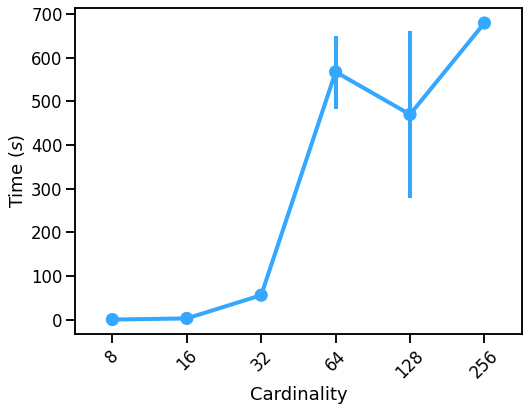

In [ ]:
graficarTiempos(filtrarDatos("alg_random",True))

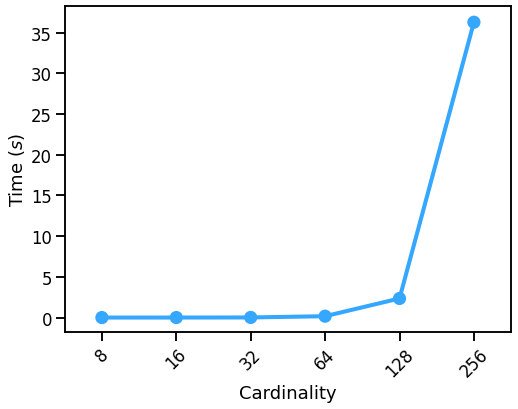

In [ ]:
graficarTiempos(filtrarDatos("alg_random",False))


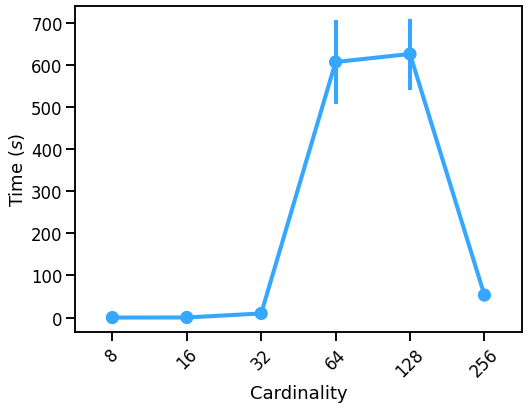

In [ ]:
graficarTiempos(filtrarDatos("boole",True))


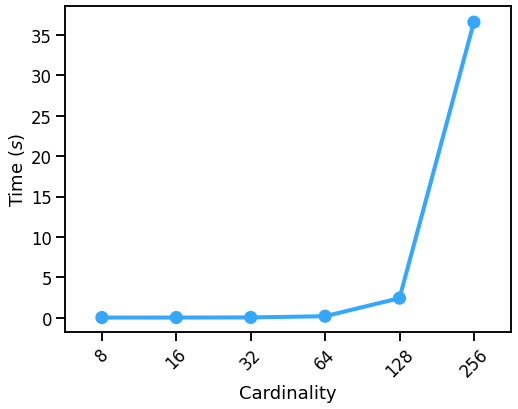

In [ ]:
graficarTiempos(filtrarDatos("boole",False))


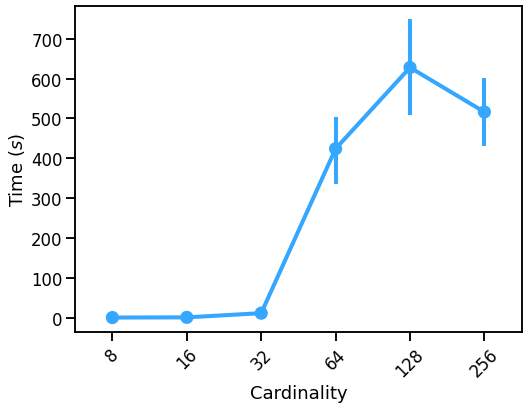

In [ ]:
graficarTiempos(filtrarDatos("grupo_abeliano",True))


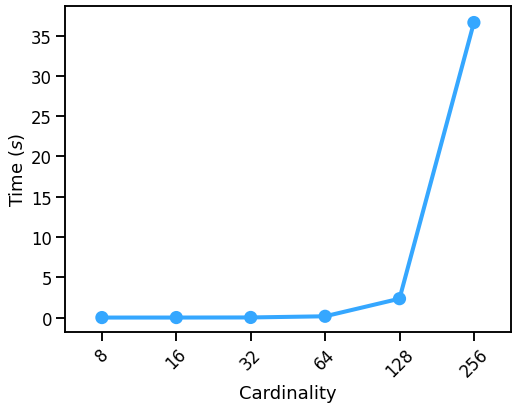

In [ ]:
graficarTiempos(filtrarDatos("grupo_abeliano",False))
